In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt  # Ensure matplotlib is also imported if used

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [5]:
df=pd.read_csv("retail_store_inventory.csv")

NameError: name 'pd' is not defined

In [7]:
!pip install scipy


   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   - -------------------------------------- 1.8/41.2 MB 10.1 MB/s eta 0:00:04
   -- ------------------------------------- 2.9/41.2 MB 8.4 MB/s eta 0:00:05
   -- ------------------------------------- 2.9/41.2 MB 8.4 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/41.2 MB 4.4 MB/s eta 0:00:09
   --- ------------------------------------ 3.1/41.2 MB 4.4 MB/s eta 0:00:09
   --- ------------------------------------ 3.7/41.2 MB 2.9 MB/s eta 0:00:13
   ---- ----------------------------------- 4.5/41.2 MB 3.1 MB/s eta 0:00:12
   ---- ----------------------------------- 4.5/41.2 MB 3.1 MB/s eta 0:00:12
   ---- ----------------------------------- 4.7/41.2 MB 2.5 MB/s eta 0:00:15
   ----- ---------------------------------- 5.2/41.2 MB 2.5 MB/s eta 0:00:15
   ----- ---------------------------------- 5.8/41.2 MB 2.5 MB/s eta 0:00:15
   ------ --------------------------------- 6.6/41.2 MB 2.5 MB/s eta 0:00:14
   --

In [9]:
df=pd.read_csv("retail_store_inventory.csv")

In [10]:
def explore_data(df):
    print("Dataset Overview")
    print(df.info())
    print("Summary Statistics")
    print(df.describe())
    print("Missing Values Before Handling")
    print(df.isnull().sum())
    print("Duplicate Rows Before Removal:", df.duplicated().sum())


explore_data(df)

Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
m

In [11]:
def clean_data(df):

    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)
    df.drop_duplicates(inplace=True)

    return df
df = clean_data(df)

print("Data Cleaning Completed!")

Data Cleaning Completed!


C:\Users\Mani\AppData\Local\Temp\ipykernel_20952\1837990220.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Mani\AppData\Local\Temp\ipykernel_20952\1837990220.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [12]:
# -----------------------------------------------
def remove_outliers(df, column):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        z_scores = np.abs(stats.zscore(df[column]))
        df = df[z_scores < 3]

    return df


In [13]:
for col in ["Inventory Level", "Units Sold", "Price"]:
    df = remove_outliers(df, col)

print("\n✅ Outliers Handled Successfully!")


✅ Outliers Handled Successfully!


In [14]:
def create_new_features(df):
    """Generates new meaningful columns for better insights"""
    df["Stock Status"] = np.where(df["Inventory Level"] < 50, "Low Stock", "Sufficient Stock")

    # Create Sales Efficiency Ratio
    df["Sales Efficiency"] = df["Units Sold"] / (df["Units Ordered"] + 1)

    return df

# Apply feature engineering
df = create_new_features(df)

print("\n✅ Feature Engineering Completed!")



✅ Feature Engineering Completed!


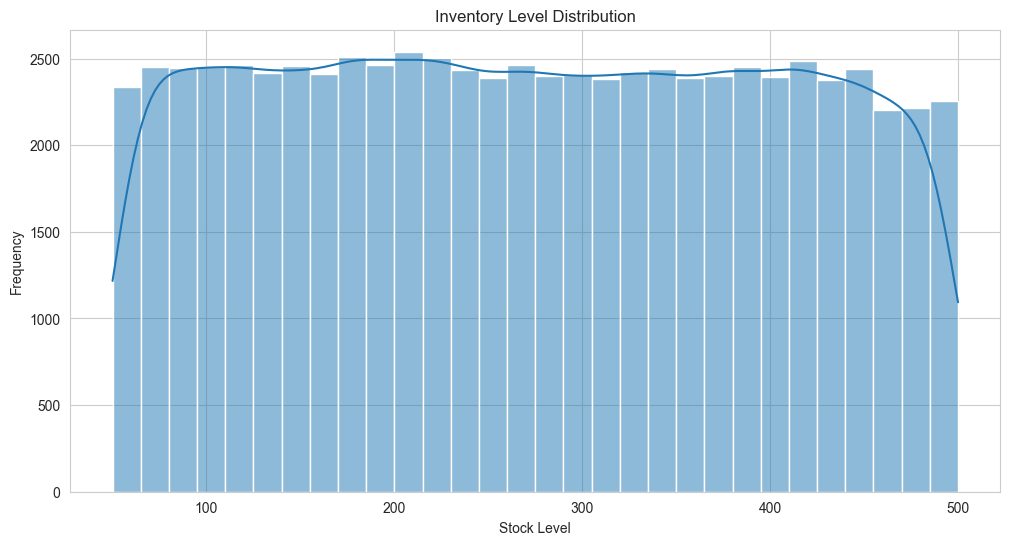

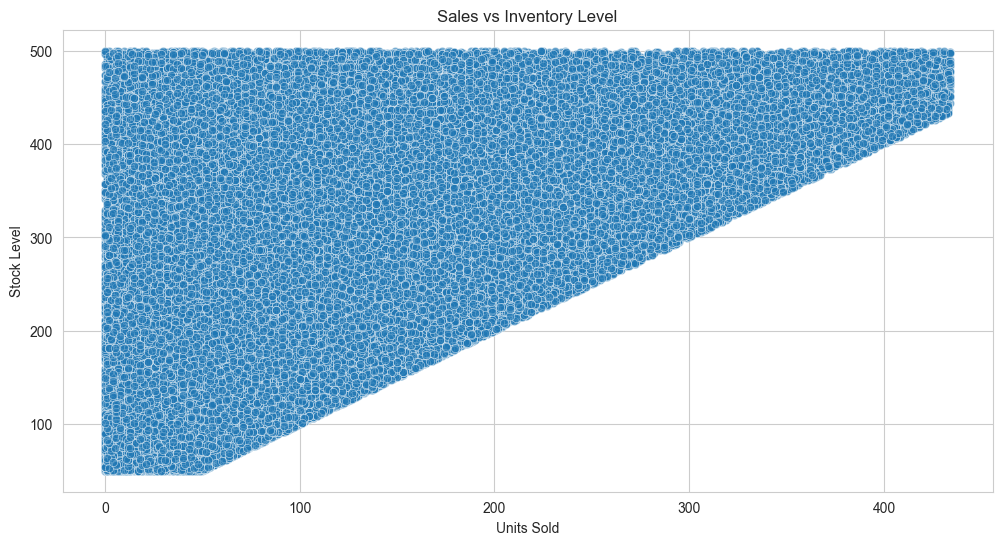

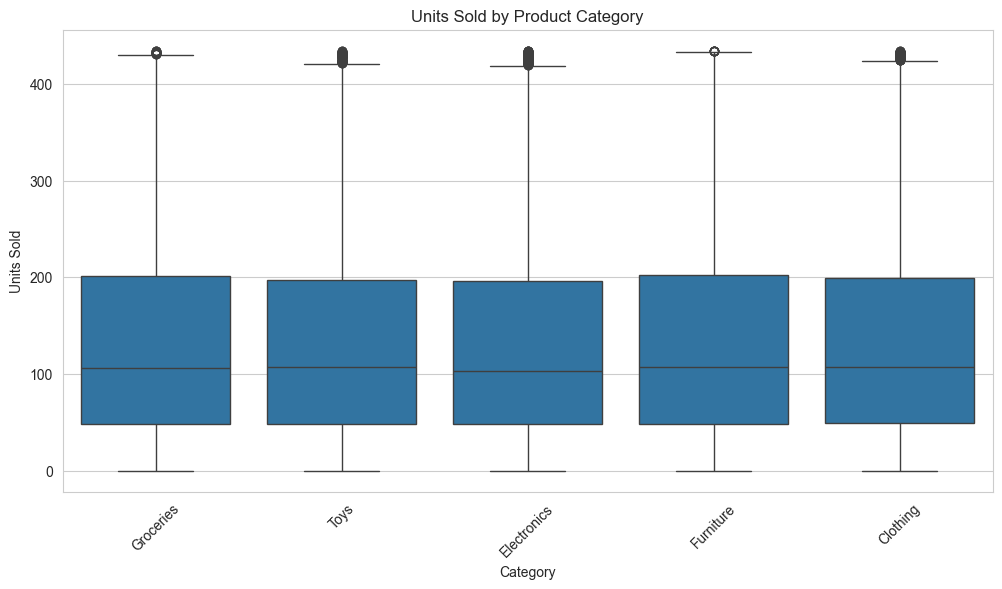

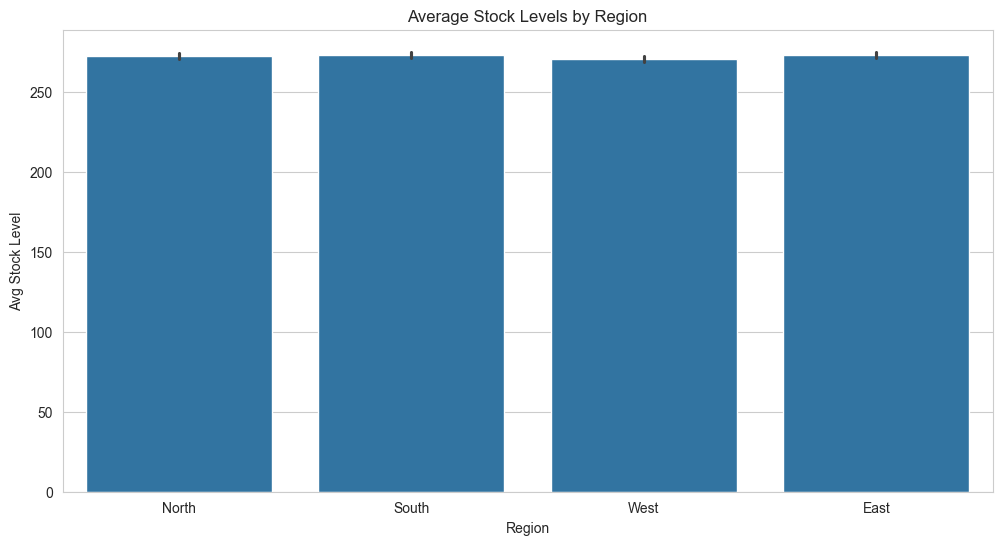

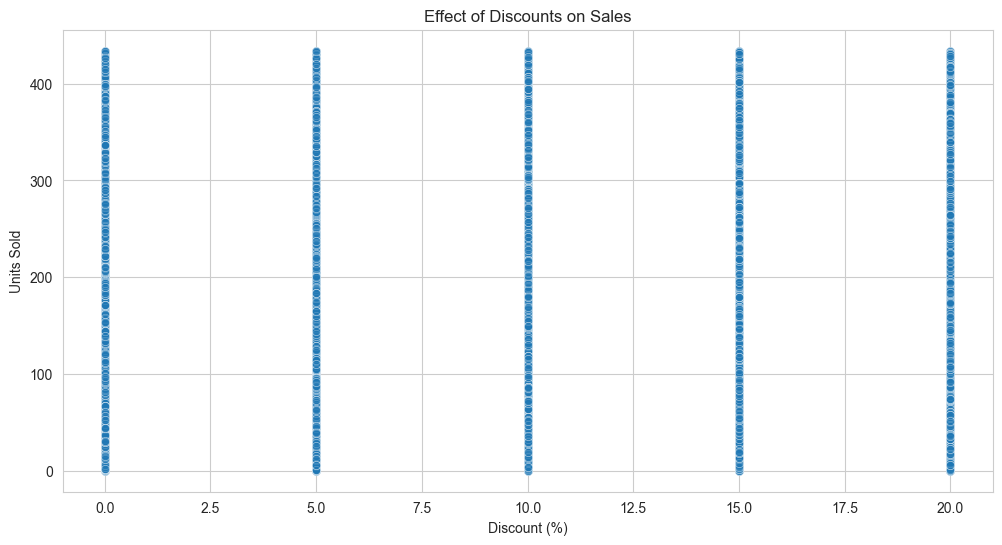

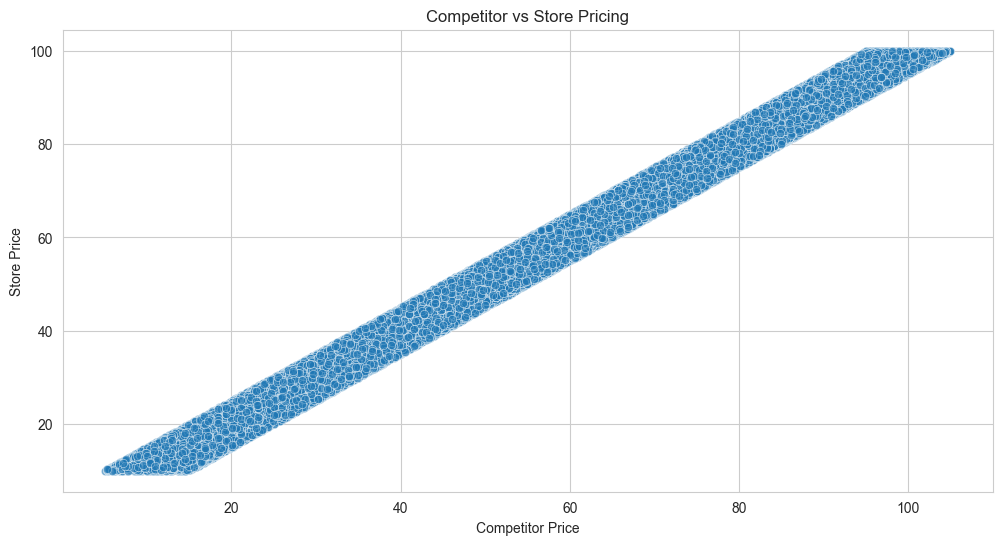


✅ Data Visualization Completed!


In [15]:
def plot_data(df):
    """Generates key visualizations for data insights"""
    
    # 📊 Inventory Level Distribution
    plt.figure()
    sns.histplot(df["Inventory Level"], bins=30, kde=True)
    plt.title("Inventory Level Distribution")
    plt.xlabel("Stock Level")
    plt.ylabel("Frequency")
    plt.show()

    # 📊 Sales vs Inventory Level
    plt.figure()
    sns.scatterplot(x=df["Units Sold"], y=df["Inventory Level"], alpha=0.6)
    plt.title("Sales vs Inventory Level")
    plt.xlabel("Units Sold")
    plt.ylabel("Stock Level")
    plt.show()

    # 📊 Units Sold by Category
    plt.figure()
    sns.boxplot(x="Category", y="Units Sold", data=df)
    plt.xticks(rotation=45)
    plt.title("Units Sold by Product Category")
    plt.xlabel("Category")
    plt.ylabel("Units Sold")
    plt.show()

    
    plt.figure()
    sns.barplot(x="Region", y="Inventory Level", data=df, estimator=np.mean)
    plt.title("Average Stock Levels by Region")
    plt.xlabel("Region")
    plt.ylabel("Avg Stock Level")
    plt.show()

    
    plt.figure()
    sns.scatterplot(x=df["Discount"], y=df["Units Sold"], alpha=0.6)
    plt.title("Effect of Discounts on Sales")
    plt.xlabel("Discount (%)")
    plt.ylabel("Units Sold")
    plt.show()


    plt.figure()
    sns.scatterplot(x=df["Competitor Pricing"], y=df["Price"], alpha=0.6)
    plt.title("Competitor vs Store Pricing")
    plt.xlabel("Competitor Price")
    plt.ylabel("Store Price")
    plt.show()

# Call visualization function
plot_data(df)

print("\n✅ Data Visualization Completed!")

In [18]:
cleaned_file_path = "retail_store_inventory.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned Data Saved at: {cleaned_file_path}")

Cleaned Data Saved at: retail_store_inventory.csv
